In [5]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import pickle

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [6]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
seeds = [11,12,13,14,15]
learning_rates = [0.25]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [7]:
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, lr: 0.25, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 5, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}
finding good initializer from train data


2025-06-01 12:13:32.300313: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[0, 60] ans[31, 29] cl_acc 0.517 3.881sec


2025-06-01 12:13:36.201847: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.100  clct[59, 1] ans[33, 27] cl_acc 0.567 3.604sec


2025-06-01 12:13:39.829659: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[6, 54] ans[31, 29] cl_acc 0.583 3.785sec


2025-06-01 12:13:43.638215: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.110  clct[40, 20] ans[29, 31] cl_acc 0.817 3.758sec


2025-06-01 12:13:47.420123: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.096  clct[24, 36] ans[30, 30] cl_acc 0.533 3.847sec
found good initializer
Epoch -1 tr: l 4.673 a 0.097  clct[27, 33] ans[30, 30] cl_acc 0.583 3.629sec
Epoch -1 tst: l 4.673 a 0.095  clct[17, 23] ans[20, 20] cl_acc 0.625 2.366sec
Epoch 0 tr: l 1.997 a 0.383  clct[31, 29] ans[33, 27] lr 0.250000 cl_acc 0.933 43.836sec(train) 4.097sec(infer)
Epoch 0 tst: l 1.879 a 0.425  clct[20, 20] ans[20, 20] cl_acc 1.000 2.674sec
result written at output/results.pickle
Epoch 1 tr: l 1.786 a 0.503  clct[31, 29] ans[29, 31] lr 0.247500 cl_acc 1.000 43.054sec(train) 3.705sec(infer)
Epoch 1 tst: l 1.691 a 0.532  clct[20, 20] ans[20, 20] cl_acc 1.000 2.456sec
Epoch 2 tr: l 1.755 a 0.530  clct[24, 36] ans[36, 24] lr 0.245025 cl_acc 1.000 43.165sec(train) 3.818sec(infer)
Epoch 2 tst: l 1.659 a 0.566  clct[20, 20] ans[20, 20] cl_acc 1.000 2.387sec
Epoch 3 tr: l 1.778 a 0.554  clct[28, 32] ans[32, 28] lr 0.242575 cl_acc 1.000 43.092sec(train) 3.797sec(infer)
Epoch 3 tst: l 1.676 a 0.5

2025-06-01 12:18:08.615521: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.127  clct[34, 26] ans[28, 32] cl_acc 0.500 3.933sec
found good initializer
Epoch -1 tr: l 4.674 a 0.120  clct[26, 34] ans[28, 32] cl_acc 0.600 3.724sec
Epoch -1 tst: l 4.674 a 0.124  clct[27, 13] ans[20, 20] cl_acc 0.575 2.288sec
Epoch 0 tr: l 2.026 a 0.379  clct[13, 47] ans[33, 27] lr 0.250000 cl_acc 0.600 43.468sec(train) 3.758sec(infer)
Epoch 0 tst: l 1.935 a 0.412  clct[4, 36] ans[20, 20] cl_acc 0.600 2.404sec
result written at output/results.pickle
Epoch 1 tr: l 1.923 a 0.457  clct[16, 44] ans[33, 27] lr 0.247500 cl_acc 0.583 43.356sec(train) 4.050sec(infer)
Epoch 1 tst: l 1.873 a 0.486  clct[3, 37] ans[20, 20] cl_acc 0.525 2.501sec
Epoch 2 tr: l 1.883 a 0.476  clct[31, 29] ans[31, 29] lr 0.245025 cl_acc 1.000 43.366sec(train) 3.886sec(infer)
Epoch 2 tst: l 1.786 a 0.511  clct[20, 20] ans[20, 20] cl_acc 1.000 2.480sec
Epoch 3 tr: l 1.782 a 0.563  clct[33, 27] ans[33, 27] lr 0.242575 cl_acc 1.000 43.322sec(train) 4.017sec(infer)
Epoch 3 tst: l 1.685 a 0.597

## Plots

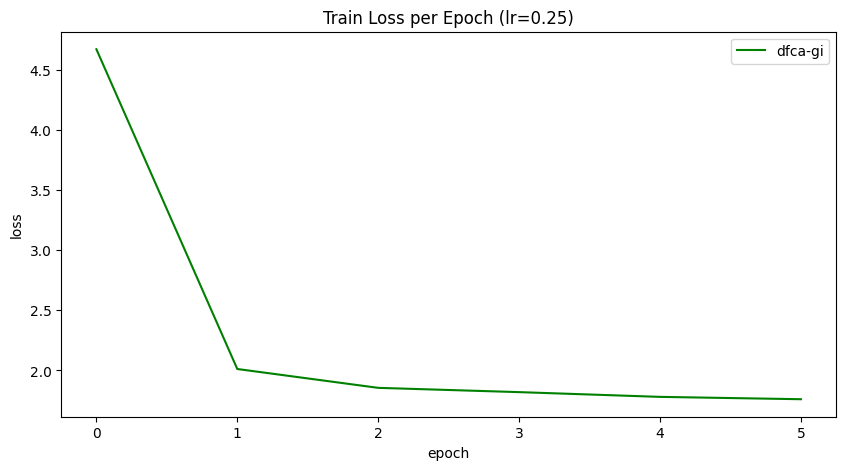

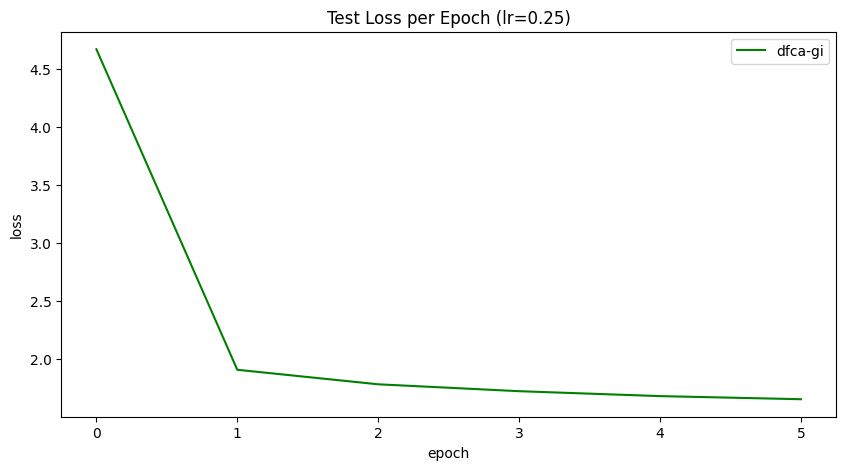

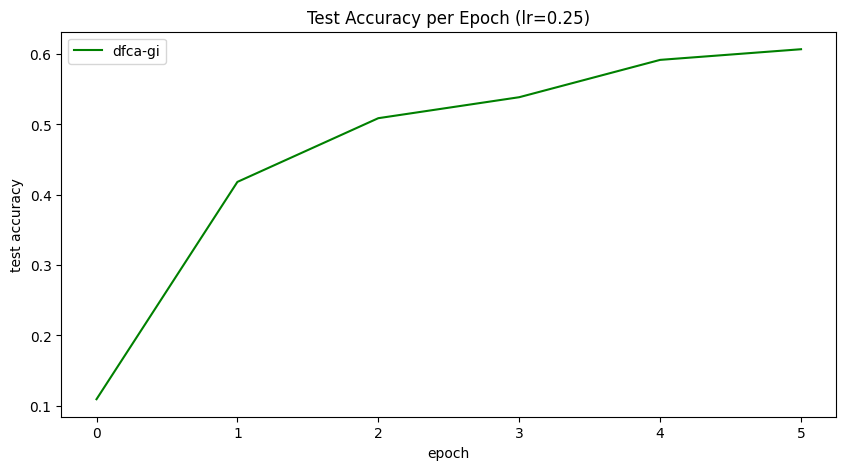

In [8]:

r_dfca_gi = {}

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

with open('res_dfca.pickle', 'wb') as f:
    pickle.dump(r_dfca_gi, f)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Clustering Accuracy (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_cl_acc.png'))

